In [1]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px

%matplotlib inline

In [2]:


# import shapefile as shp  # Requires the pyshp package
# import matplotlib.pyplot as plt
# lsoas = gpd.read_file("IND_adm/IND_adm3.shp")

# fig, ax = plt.subplots(1, figsize=(20, 12))
# ax.axis("off")

# ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
#              fontdict =  {"fontsize": "25", "fontweight" : "3"})

# # merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
# #                  linewidth=0.8, ax=ax, edgecolor="0", 
# #                  legend = True)


# lsoas.plot(ax=ax)
# plt.show()



In [19]:
age_details = pd.read_csv('New_Data/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('New_Data/covid_19_india.csv')
hospital_beds = pd.read_csv('New_Data/HospitalBedsIndia.csv')
individual_details = pd.read_csv('New_Data/IndividualDetails.csv')
ICMR_details = pd.read_csv('New_Data/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('New_Data/ICMRTestingLabs.csv')
state_testing = pd.read_csv('New_Data/StatewiseTestingDetails.csv')

In [20]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'])
state_testing['Date'] = pd.to_datetime(state_testing['Date'])

In [22]:
state_details = pd.pivot_table(india_covid_19, values=['ConfirmedForeignNational','ConfirmedIndianNational','Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details = state_details.sort_values(by='Confirmed', ascending= False)

state_details["Total"] = state_details.Confirmed + state_details.Cured + state_details.Deaths

state_details["States/UT"] = state_details.index
state_details.sort_values(by=['States/UT'],inplace =True)
state_details.head()

,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total,States/UT
State/UnionTerritory,,,,,,,
Andaman and Nicobar Islands,33,0,6,32,0,65,Andaman and Nicobar Islands
Andhra Pradesh,1717,0,9,589,36,2342,Andhra Pradesh
Arunachal Pradesh,1,-,-,1,0,2,Arunachal Pradesh
Assam,43,-,-,32,1,76,Assam
Bihar,529,0,9,130,4,663,Bihar


In [23]:
map_data = gpd.read_file("./India_Shape_File/Indian_States.shp")
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [24]:
map_data["States/UT"] = map_data["States/UT"].str.replace("&","and")

In [25]:
map_data["States/UT"].replace("Arunanchal Pradesh", "Arunachal Pradesh", inplace = True)
map_data["States/UT"].replace("Telangana", "Telengana", inplace = True)
map_data["States/UT"].replace("NCT of Delhi",  "Delhi", inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands',inplace = True)

In [26]:
state_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Andaman and Nicobar Islands to West Bengal
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Confirmed                 36 non-null     int64 
 1   ConfirmedForeignNational  36 non-null     object
 2   ConfirmedIndianNational   36 non-null     object
 3   Cured                     36 non-null     int64 
 4   Deaths                    36 non-null     int64 
 5   Total                     36 non-null     int64 
 6   States/UT                 36 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.2+ KB


In [27]:
merged_data = pd.merge(map_data, state_details, how = "left", on = "States/UT")

merged_data.fillna({'Confirmed':0,'ConfirmedIndianNational':0,'Cured':0,'Total':0,'ConfirmedIndianNational':0}, inplace = True)

In [38]:
state_details.sort_values(by=["Total"],inplace=True)
state_details.tail(10)

,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total,States/UT
State/UnionTerritory,,,,,,,
West Bengal,1259,0,9,218,133,1610,West Bengal
Telengana,1085,9,8,585,29,1699,Telengana
Andhra Pradesh,1717,0,9,589,36,2342,Andhra Pradesh
Uttar Pradesh,2859,1,9,944,53,3856,Uttar Pradesh
Madhya Pradesh,3049,0,7,1000,176,4225,Madhya Pradesh
Rajasthan,3061,2,52,1394,77,4532,Rajasthan
Tamil Nadu,3550,6,7,1409,31,4990,Tamil Nadu
Delhi,4898,1,9,1431,64,6393,Delhi
Gujarat,5804,1,7,1195,319,7318,Gujarat


In [28]:
merged_data[merged_data["States/UT"]=="Maharashtra"].head()

,States/UT,geometry,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total
18,Maharashtra,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16...",14541.0,3,86,2465.0,583.0,17589.0


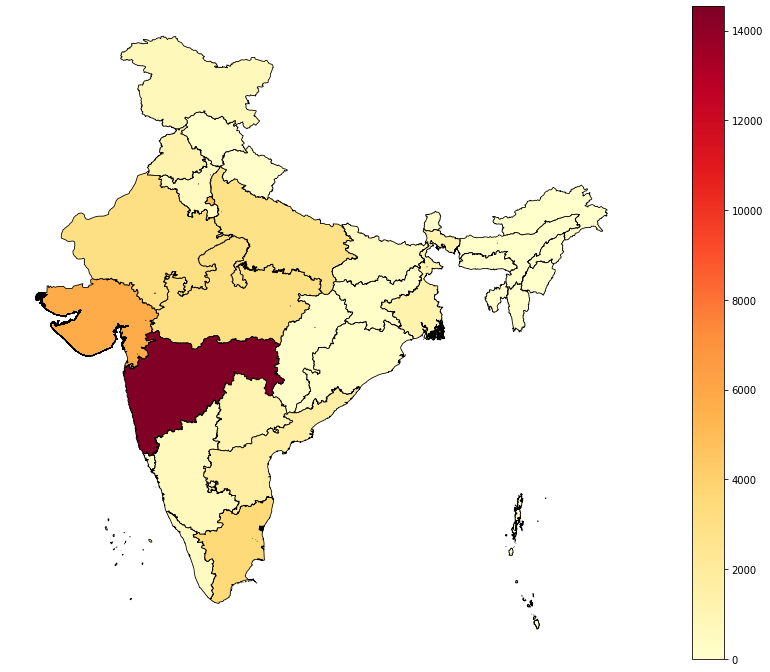

In [12]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

# ax.set_title('Covid-19 Statewise Data — Confirmed Cases', fontdict =  {"fontsize": "25", "fontweight" : "3"})

merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0", 
                 legend = True)
plt.show()

In [25]:
merged_data["ConfirmedIndianNational"].replace('-','0',inplace=True)
merged_data["ConfirmedIndianNational"] = merged_data["ConfirmedIndianNational"].apply(int)

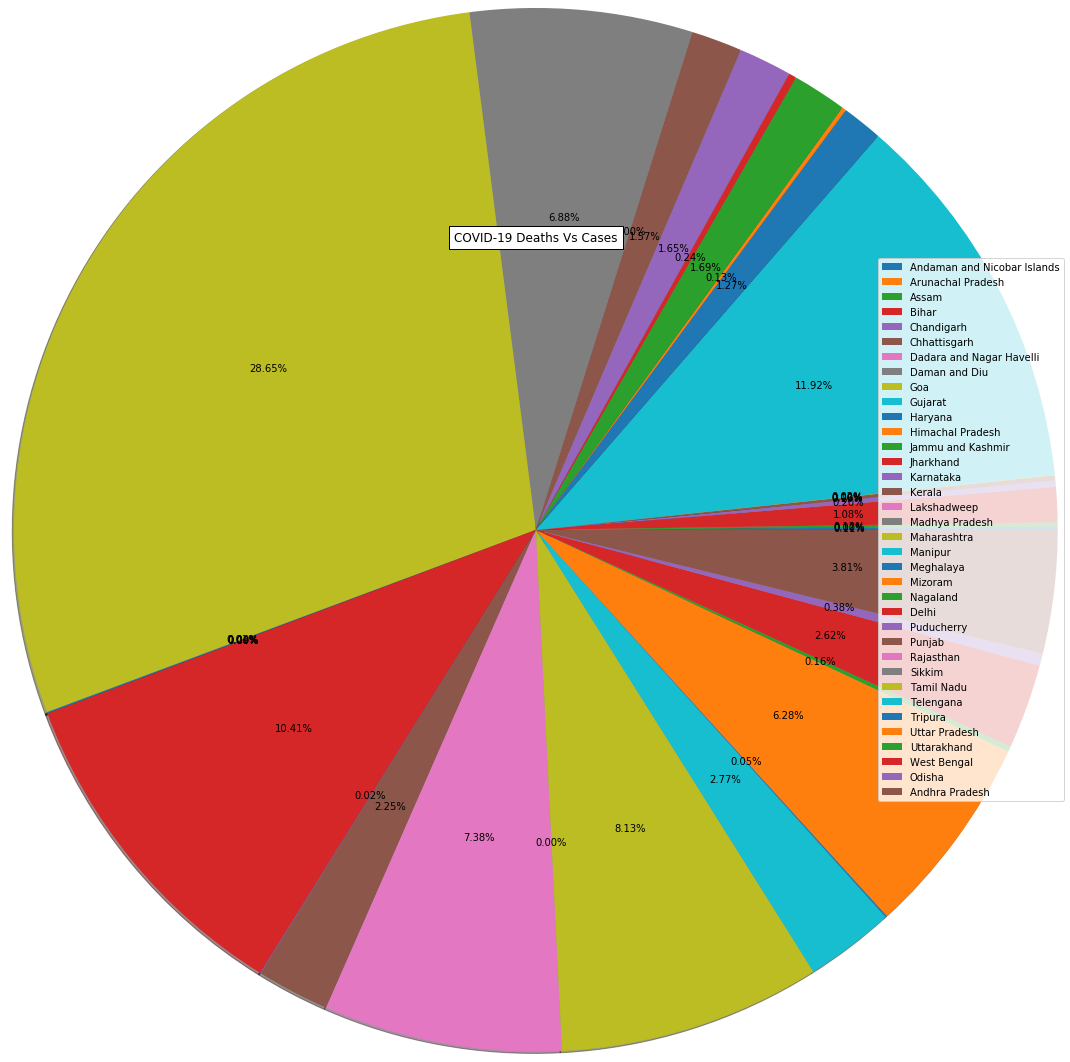

In [26]:
state = merged_data["States/UT"]
cases = merged_data["Total"]

# explode = merged_data.ConfirmedIndianNational.apply(lambda x:x > 100)
# explode = explode.apply(lambda x:0.2 if x == True else 0)

plt.title("COVID-19 Deaths Vs Cases", bbox={"facecolor":"1", "pad":5}).set_position([.5,1.8])
plt.pie(cases,autopct="%1.2f%%",shadow=True, radius=6,)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.show()

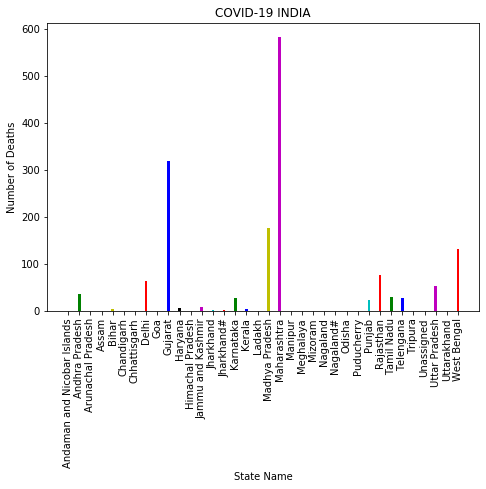

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state_details["States/UT"],state_details["Deaths"], color = list("rgbkymc"), width = 0.25)
plt.title("COVID-19 INDIA")
plt.xticks(rotation=90)
plt.xlabel("State Name")
plt.ylabel("Number of Deaths")
plt.show()